In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

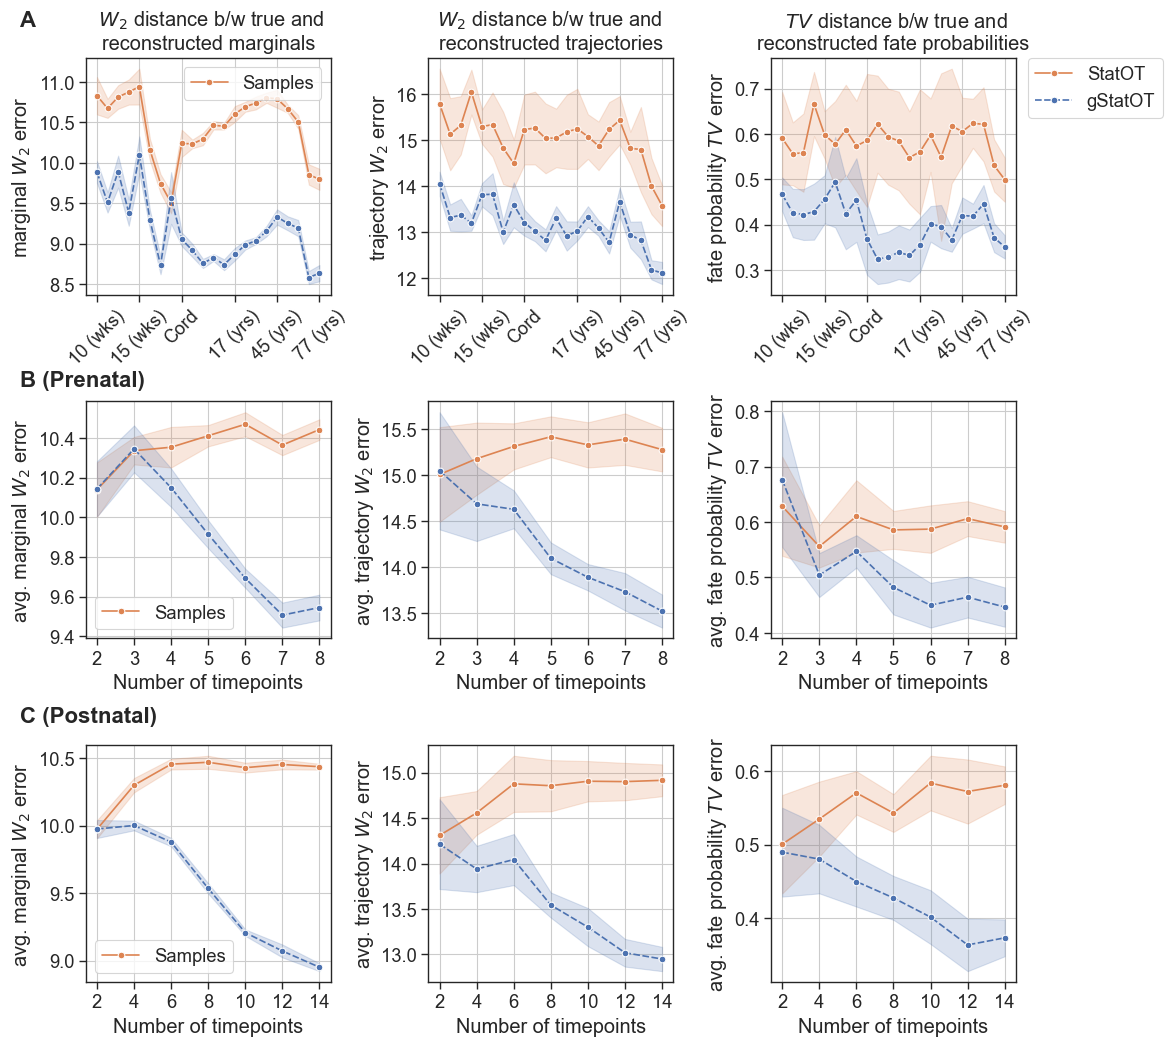

In [2]:
# Hemo validation results can be reproduced for each value of T with the scripts in extra/figures/hemo_validation_results/. 
# We provide csvs with the for combined results for all values of T.

pre_all_pd = pd.read_csv('./hemo_validation_results/prenatal_validation_res.csv', index_col=0)
post_all_pd = pd.read_csv('./hemo_validation_results/postnatal_validation_res.csv', index_col=0)

pre_all_pd['Age range'] = 'Prenatal'
post_all_pd['Age range'] = 'Postnatal'

pre_all_pd['age_all'] = (pre_all_pd['Age'].values.astype(int).astype(str) + ' (wks)')
post_all_pd['age_all'] = (post_all_pd['Age'].values.astype(int).astype(str) + ' (yrs)')

all_pd = pd.concat([pre_all_pd, post_all_pd], ignore_index=True)

sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")

sub_res = all_pd.copy()
sub_res['method'] = sub_res['method'].replace(
    to_replace=r'gStatOT.*', value='gStatOT', regex=True)
sub_res['method'] = sub_res['method'].replace(
    to_replace=r'StatOT_e.*', value='StatOT', regex=True)

sub_res.loc[sub_res['age_all'] == '0 (yrs)', 'age_all'] = 'Cord'
sub_res['age_all'] = sub_res['age_all'].astype('category')

age_all_list = [ '10 (wks)',  '11 (wks)', '13 (wks)',
       '14 (wks)', '15 (wks)','20 (wks)', '22 (wks)','23 (wks)', 'Cord', '2 (yrs)', '4 (yrs)', '10 (yrs)', '12 (yrs)', '17 (yrs)',
        '25 (yrs)', '32 (yrs)', '35 (yrs)',  '45 (yrs)',
       '53 (yrs)', '62 (yrs)', '76 (yrs)', '77 (yrs)']

sub_res['age_all'] = sub_res['age_all'].cat.reorder_categories(age_all_list)




methods = ["Samples", "StatOT", "gStatOT"]
palette = {methods[0]: sns.color_palette("deep", n_colors=2)[1],
           methods[1]: sns.color_palette("deep", n_colors=2)[1],
           methods[2]: sns.color_palette("deep", n_colors=2)[0]}

x_label = 'Number of timepoints'
x_ticks = ['10 (wks)', '15 (wks)', 'Cord',  '17 (yrs)', '45 (yrs)',  '77 (yrs)']
x_ticks_3 = np.arange(2, 15, 2, dtype=int)
x_ticks_2 = np.arange(2, 9, 1, dtype=int)
l = 4
fig, axes = plt.subplots(3, 3, figsize=(3 * l , 3 * l), sharex='row', 
                         gridspec_kw={'hspace': 0.45, 'wspace': 0.4})

ax1 = axes[1, 0]
ax2 = axes[1, 1]
ax3 = axes[1, 2]

ax4 = axes[2, 0]
ax5 = axes[2, 1]
ax6 = axes[2, 2]

N_df_W2 = sub_res.groupby(['method', 'T', 'experiment', 'Age range'], as_index=False)['marginal_W2_dist'].mean()
N_df_W2_pre = N_df_W2[N_df_W2['Age range'] == 'Prenatal']
N_df_W2_post = N_df_W2[N_df_W2['Age range'] == 'Postnatal']
# change statOT method to samples in N_df_W2
N_df_W2.loc[N_df_W2['method'] == 'StatOT', 'method'] = 'Samples'

sns.lineplot(N_df_W2_pre, x='T', y='marginal_W2_dist', hue='method',
             ax=ax1, palette=palette, marker='o', style='method', errorbar='sd')
sns.lineplot(N_df_W2_post, x='T', y='marginal_W2_dist', hue='method',
             ax=ax4, palette=palette, marker='o', style='method', errorbar='sd')
ax1.set_ylabel(r'avg. marginal $W_2$ error')
ax4.set_ylabel(r'avg. marginal $W_2$ error')
ax1.set_xticks(x_ticks_2)
ax4.set_xticks(x_ticks_3)

ax1.set_xlabel(x_label)
ax4.set_xlabel(x_label)
labels = ['Samples']
ax1.legend(labels=labels)
ax4.legend(labels=labels)
ax1.grid()
ax4.grid()

N_df_W2 = sub_res.groupby(['method', 'T', 'experiment', 'Age range'], as_index=False)[
    'traj_W2_dist'].mean()
N_df_W2_pre = N_df_W2[N_df_W2['Age range'] == 'Prenatal']
N_df_W2_post = N_df_W2[N_df_W2['Age range'] == 'Postnatal']

sns.lineplot(N_df_W2_pre, x='T', y='traj_W2_dist', hue='method',
             ax=ax2, palette=palette, marker='o', style='method', errorbar='sd')
sns.lineplot(N_df_W2_post, x='T', y='traj_W2_dist', hue='method',
             ax=ax5, palette=palette, marker='o', style='method', errorbar='sd')
ax2.set_ylabel(r'avg. trajectory $W_2$ error')
ax5.set_ylabel(r'avg. trajectory $W_2$ error')
ax2.legend().set_visible(False)
ax5.legend().set_visible(False)
ax2.set_xlabel(x_label)
ax5.set_xlabel(x_label)
ax2.grid()
ax5.grid()

N_df_Blin = sub_res.groupby(['method', 'T', 'experiment', 'Age range'], as_index=False)['FP_TV_dist'].mean()
N_df_Blin_pre = N_df_Blin[N_df_Blin['Age range'] == 'Prenatal']
N_df_Blin_post = N_df_Blin[N_df_Blin['Age range'] == 'Postnatal']
sns.lineplot(N_df_Blin_pre, x='T', y='FP_TV_dist', hue='method',
             ax=ax3, palette=palette, marker='o', style='method', errorbar='sd')
sns.lineplot(N_df_Blin_post, x='T', y='FP_TV_dist', hue='method',
             ax=ax6, palette=palette, marker='o', style='method', errorbar='sd')
ax3.set_ylabel(r'avg. fate probability $TV$ error')
ax6.set_ylabel(r'avg. fate probability $TV$ error')
ax3.legend().set_visible(False)
ax6.legend().set_visible(False)
ax3.set_xlabel(x_label)
ax6.set_xlabel(x_label)
ax3.grid()
ax6.grid()


ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[0, 2]


sub_res_2 = sub_res[((sub_res['N'].isin([4000]) & (sub_res['Age range'] == 'Prenatal')) | (sub_res['N'].isin([7000]) & (sub_res['Age range'] == 'Postnatal')))].copy()
sub_res_2 = sub_res_2.iloc[::-1].reset_index(drop=True)

sub_res_2_W2_dist = sub_res_2.copy()
sub_res_2_W2_dist.loc[sub_res_2_W2_dist['method']
                      == 'StatOT', 'method'] = 'Samples'

lineplot1 = sns.lineplot(x='age_all', y='marginal_W2_dist', hue='method',
                         data=sub_res_2_W2_dist, ax=ax1, palette=palette, marker='o', style='method', errorbar='sd')
ax1.set_xticks(x_ticks, labels=x_ticks, rotation=45)
ax1.set_xlabel('')
ax1.legend(labels=labels)
ax1.set_ylabel(r'marginal $W_2$ error')
ax1.set_title(r' $W_2$ distance b/w true and' +
              '\n' + 'reconstructed marginals')
lineplot2 = sns.lineplot(x='age_all', y='traj_W2_dist', hue='method',
                         data=sub_res_2, ax=ax2, palette=palette, marker='o', style='method', errorbar='sd')
ax2.set_xticks(x_ticks, labels=x_ticks, rotation=45)
ax2.set_xlabel('')
ax2.set_ylabel(r'trajectory $W_2$ error')
ax2.set_title(r'$W_2$ distance b/w true and ' +
              '\n' + 'reconstructed trajectories')
ax2.legend().set_visible(False)

lineplot3 = sns.lineplot(x='age_all', y='FP_TV_dist', hue='method',
                         data=sub_res_2, ax=ax3, palette=palette, marker='o', style='method', errorbar='sd')
ax3.set_xticks(x_ticks, labels=x_ticks, rotation=45)
ax3.set_xlabel('')
ax3.set_title(r' $TV$ distance b/w true and' + '\n' +
              'reconstructed fate probabilities')
ax3.set_ylabel(r'fate probability $TV$ error')

ax3.legend().set_visible(False)

ax3.grid()
ax1.grid()
ax2.grid()

fig.text(0.07, 0.92, "A", fontsize=16, fontweight='bold', va='top', ha='left')
fig.text(0.07, 0.62, "B (Prenatal)", fontsize=16, fontweight='bold', va='top', ha='left')
fig.text(0.07, 0.34, "C (Postnatal)", fontsize=16, fontweight='bold', va='top', ha='left')
axes[0, -1].legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
)

#plt.tight_layout()